### Task : Classification ( Linear SVM Classifier -> Binary )
#### Input Features (Predictor Variables) : petal length (cm), petal width (cm)
#### Output (Response Variable(s)) : Class (0 or 1)

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, model_selection, preprocessing, base, metrics, datasets, pipeline

### Collecting and Analyzing data

In [2]:
data = datasets.load_iris()

print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
# Creating a data frame (for analysis)

df = pd.DataFrame(data.data[:, 2:], columns = data.feature_names[2:])
df['target'] = data.target
df = df[df['target'] != 2]
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  100 non-null    float64
 1   petal width (cm)   100 non-null    float64
 2   target             100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.7 KB


In [5]:
df['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [6]:
df.describe()

,petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000
mean,2.861000,0.786000,0.500000
std,1.449549,0.565153,0.502519
min,1.000000,0.100000,0.000000
25%,1.500000,0.200000,0.000000
50%,2.450000,0.800000,0.500000
75%,4.325000,1.300000,1.000000
max,5.100000,1.800000,1.000000


In [7]:
# Correlation Matrix

corr_matrix = df.drop('target', axis = 1).corr()
corr_matrix

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.979322
petal width (cm),0.979322,1.000000


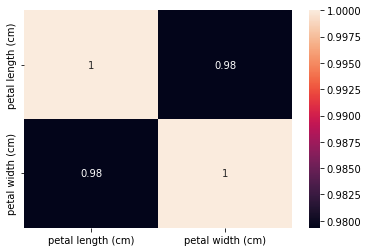

In [8]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [9]:
num_attr = ['petal length (cm)', 'petal width (cm)']
target = df.columns[-1]

df0 = df[df[target] == 0]
df1 = df[df[target] == 1]

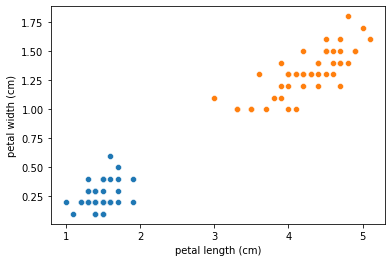

In [10]:
for df_ in [df0, df1]:
    sns.scatterplot(x = num_attr[0], y = num_attr[1], data = df_)
plt.show()

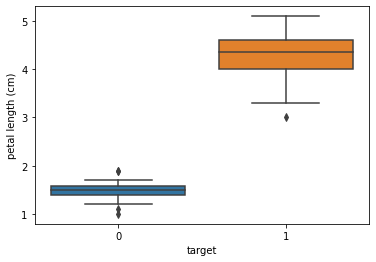

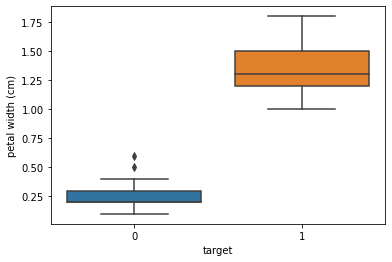

In [11]:
# Box Plot

for var in num_attr:
    sns.boxplot(x = target, y = var, data = df)
    plt.show()

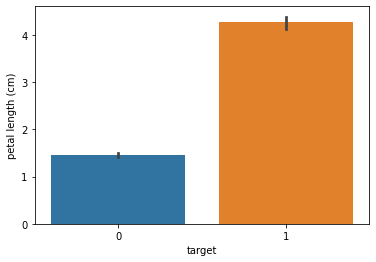

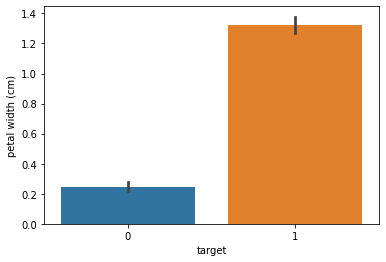

In [12]:
# Bar Plot

for var in num_attr:
    sns.barplot(x = target, y = var, data = df)
    plt.show()

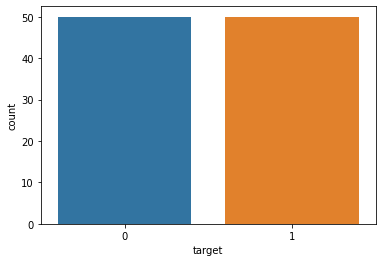

In [13]:
# Count Plot

sns.countplot(x = target, data = df)
plt.show()

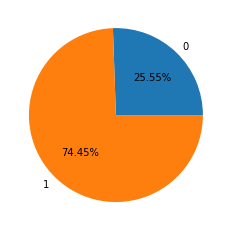

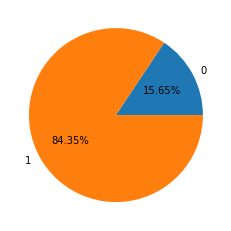

In [14]:
# Pie Chart

for var in num_attr:
    plt.pie(x = df.groupby('target')[var].mean(), labels = np.unique(df[target]), autopct = "%.2f%%")
    plt.show()

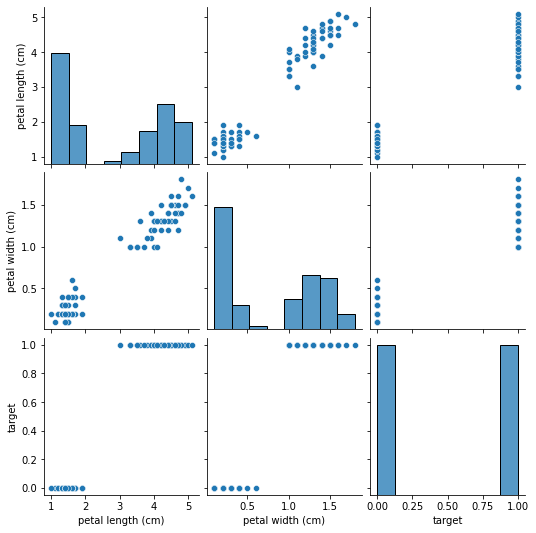

In [15]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preparation

In [1]:
# Creating a Data Transformation Pipeline for Feature Scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

NameError: name 'pipeline' is not defined

In [17]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[[target]]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [18]:
print(train_set.shape, test_set.shape)

(80, 3) (20, 3)


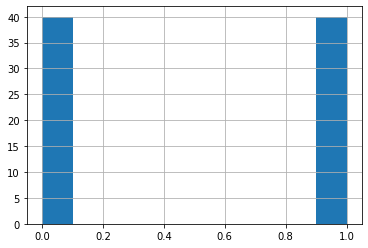

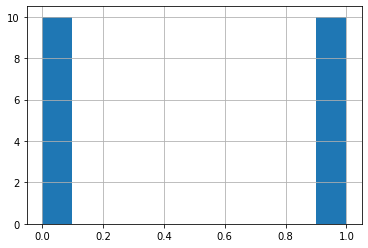

In [19]:
# Checking whether the samples are uniformely distributed

train_set['target'].hist()
plt.show()

test_set['target'].hist()
plt.show()

In [20]:
# Scaling the features

train_set_scaled = p.fit_transform(train_set.iloc[:, :-1])

train_set_scaled = np.c_[train_set_scaled, train_set.iloc[:, -1]]

In [21]:
X_train = train_set_scaled[:, :-1]
y_train = train_set_scaled[:, -1].astype(int)

### Training the model and Evaluating it's performance

In [23]:
# Implementing Linear SVC from scratch

class SVMClassifier:
    
    def __init__(self, lam = 0.001, lr = 0.01, n_iter = 1000):
        self.lam = lam
        self.lr, self.n_iter = lr, n_iter
        self.w = self.b = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y = np.where(y == 0, -1, 1)
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(self.w, x_i) - self.b) >= 1
                if condition:
                    dw = 2 * self.lam * self.w
                else:
                    dw = 2 * self.lam * self.w - np.dot(y[idx], x_i)
                    db = y[idx]
                self.w -= self.lr * dw
                self.b -= self.lr * db
            
    def predict(self, X):
        y_pred = ((np.dot(X, self.w) - self.b) >= 0).astype(int)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc

In [24]:
# Training the Classifier

clf = SVMClassifier()

clf.fit(X_train, y_train)

In [25]:
train_acc = clf.score(X_train, y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 1.0


#### Sklearn Implementation

In [26]:
# Training the Model

model = svm.LinearSVC()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_acc = model.score(X_train, y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 1.0


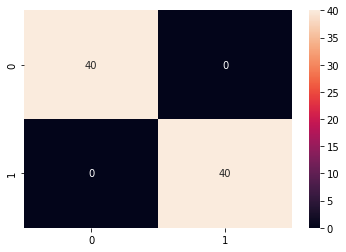

In [27]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [28]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0]
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 1.0
Recall or Sensitivity : 1.0
F1 Score : 1.0


In [29]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



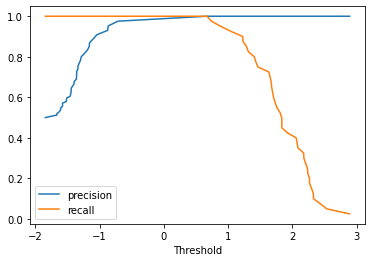

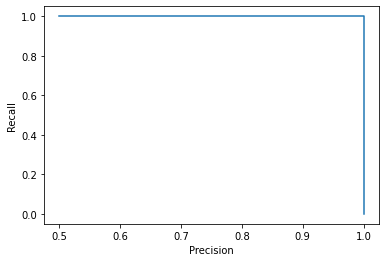

In [67]:
# Precision and Recall Curve

y_desc_scores = model_selection.cross_val_predict(svm.LinearSVC(), X_train, y_train, cv = 10, method = 'decision_function')

precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, y_desc_scores)

plt.xlabel("Threshold")
plt.plot(thresholds, precisions[:-1], label = 'precision')
plt.plot(thresholds, recalls[:-1], label = 'recall')
plt.legend()
plt.show()

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(precisions, recalls)
plt.show()

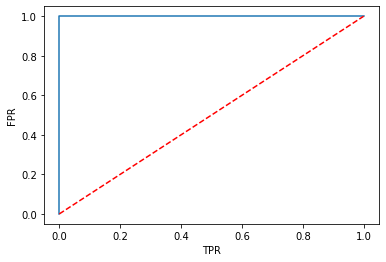

In [68]:
# Receiver Operator Characteristic Curve

tpr, fpr, thresholds = metrics.roc_curve(y_train, y_desc_scores)

plt.xlabel("TPR")
plt.ylabel("FPR")
plt.plot(tpr, fpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [69]:
# Area Under ROC Curve (AUC)

auc = metrics.roc_auc_score(y_train, y_desc_scores)
print("Area Under ROC Curve :", auc)

Area Under ROC Curve : 1.0


### Validating the model

In [70]:
test_set_scaled = p.fit_transform(test_set.iloc[:, :-1])

test_set_scaled = np.c_[test_set_scaled, test_set.iloc[:, -1]]

In [71]:
X_test = test_set_scaled[:, :-1]
y_test = test_set_scaled[:, -1].astype(int)

In [75]:
y_test_pred = model.predict(X_test)

test_acc = model.score(X_test, y_test)

print("Test Accuracy :", test_acc)

Test Accuracy : 1.0


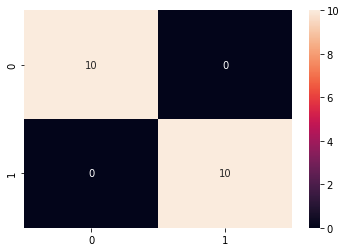

In [76]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [77]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0]
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 1.0
Recall or Sensitivity : 1.0
F1 Score : 1.0


In [78]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### Cross Validation

In [79]:
scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv = 10)

print(np.sum(scores) / len(scores))

1.0
